# Taxi Trip

**Proyek Akhir KASDD - Kelompok KASDEAD**

Fathirahma Alyssa Pristanti

2206082215

KASDAD-C

## Anggota Kelompok

- Carissa Almira Yudiva (2106751676)
- Fathirahma Alyssa Pristanti (2206082215)
- Muhammad Haekal Kalipaksi (2206817490)

# Package Installation

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn==1.5.2
%pip install xgboost
%pip install catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Global Import

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Load Train Datasets

In [3]:
url  = "https://drive.google.com/uc?id=1wnDUJCke0araT3A7SAk8ZLTIbV00R3ev"
raw_df = pd.read_csv(url)

# Data Description

## Jumlah Baris dan Kolom

In [4]:
print(f"Jumlah Baris: {raw_df.shape[0]}")
print(f"Jumlah Kolom: {raw_df.shape[1]}")

Jumlah Baris: 8000
Jumlah Kolom: 21


## Data Info

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  ehai

## Data Columns

In [6]:
raw_df.columns

Index(['ID', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge', 'payment_type'],
      dtype='object')

Berikut ini adalah deskripsi kolom pada dataset:
- **VendorID**: Kode yang menunjukkan penyedia TPEP yang menyediakan catatan.
  - *1 = Creative Mobile Technologies, LLC*
  - *2 = VeriFone Inc*
- **lpep_pickup_datetime**: Tanggal dan waktu ketika meteran dinyalakan.
- **lpep_dropoff_datetime**: Tanggal dan waktu ketika meteran dimatikan.
- **store_and_fwd_flag**: Flag yang menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor.
  - *Y = perjalanan yang disimpan dan diteruskan*
  - *N = perjalanan yang tidak disimpan dan diteruskan*
- **RatecodeID**: Kode tarif akhir yang berlaku pada akhir perjalanan.
  - *1 = Tarif standar*
  - *2 = JFK*
  - *3 = Newark*
  - *4 = Nassau atau Westchester*
  - *5 = Tarif negosiasi*
  - *6 = Perjalanan grup*
- **PULocationID**: Zona Taksi TLC di mana meteran dinyalakan.
- **DOLocationID**: Zona Taksi TLC di mana meteran dimatikan.
- **passenger_count**: Jumlah penumpang di kendaraan. Ini adalah nilai yang dimasukkan oleh sopir.
- **trip_distance**: Jarak perjalanan yang telah dilalui dalam mil yang dilaporkan oleh meteran.
- **fare_amount**: Biaya waktu dan jarak yang dihitung oleh meteran.
- **extra**: Biaya tambahan dan surcharge (misalnya, biaya tambahan $0,50 dan $1 untuk jam sibuk dan malam hari).
- **mta_tax**: Pajak MTA sebesar 0,50 dolar yang otomatis dikenakan berdasarkan tarif meteran yang digunakan.
- **tip_amount**: Jumlah tip field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.
- **tolls_amount**: Jumlah total semua tol yang dibayar selama perjalanan.
- **improvement_surcharge**: Biaya perbaikan sebesar $0,30 yang dikenakan pada awal perjalanan. Biaya ini mulai diterapkan pada tahun 2015.
- **total_amount**: Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai).
- **payment_type**: Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.
  - *1 = Kartu kredit*
  - *2 = Tunai*
- **trip_type**: Jenis perjalanan.
  - *1 = Inner city*
  - *2 = Outer city*
- **congestion_surcharge**: Jumlah total yang dikumpulkan untuk surcharge kemacetan NYC selama perjalanan.

## Data Overview

In [7]:
raw_df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,...,1.0,0.5,5.00,0.00,NaN,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,...,0.5,0.5,12.15,6.55,NaN,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,...,1.0,0.5,0.00,2.45,NaN,0.3,49.75,1.0,0.00,1.0


# Data Cleaning

## Duplicate Values

Sebelum melakukan proses training, kami ingin mengetahui apakah terdapat baris yang duplikat. Berikut adalah kode yang digunakan untuk menghitung jumlah duplikat.

In [8]:
duplicated_raws = raw_df.duplicated()
num_duplicates = duplicated_raws.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Dari hasil run kode diatas, dapat dilihat bahwa tidak terdapat data yang duplikat. Oleh karena itu, kami tidak perlu melakukan penanganan data yang duplikat.

## Missing Values

Selanjutnya kami perlu memeriksa apakah terdapat kolom yang mengandung nilai null/NaN. Untuk menentukan apakah suatu kolom perlu dihapus, kami akan meninjau persentase nilai yang hilang (missing values) pada kolom tersebut. Jika persentasenya melebihi 50%, kolom tersebut akan kita hapus. Jika tidak, kita akan melakukan imputasi data. Berikut adalah kode untuk menampilkan persentase missing values

In [9]:
MISSING_THRESHOLD = raw_df.shape[0] * 0.5

missing_counts = raw_df.isna().sum().sort_values(ascending=False)
present_counts = raw_df.notna().sum()
missing_percentage = (missing_counts / raw_df.shape[0] * 100).round(2)

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Present Values': present_counts,
    'Missing Percent': missing_percentage
})

missing_data_summary[missing_data_summary['Missing Values'] > MISSING_THRESHOLD]

,Missing Values,Present Values,Missing Percent
ehail_fee,8000,0,100.0


Setelah melakukan pengecekan, kami menemukan bahwa kolom `ehail_fee` memiliki missing values sebanyak 8000 baris (100%). Oleh karena itu, kami akan menghapus kolom tersebut dari data training.

In [10]:
raw_df = raw_df.drop(columns=['ehail_fee'], axis=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  impr

Dari hasil eksekusi kode diatas, dapat dilihat bahwa untuk setiap kolom sudah tidak ada yang memiliki missing value.

# Data Exploration

## Faktor Yang Mempengaruhi Tarif Total Perjalanan

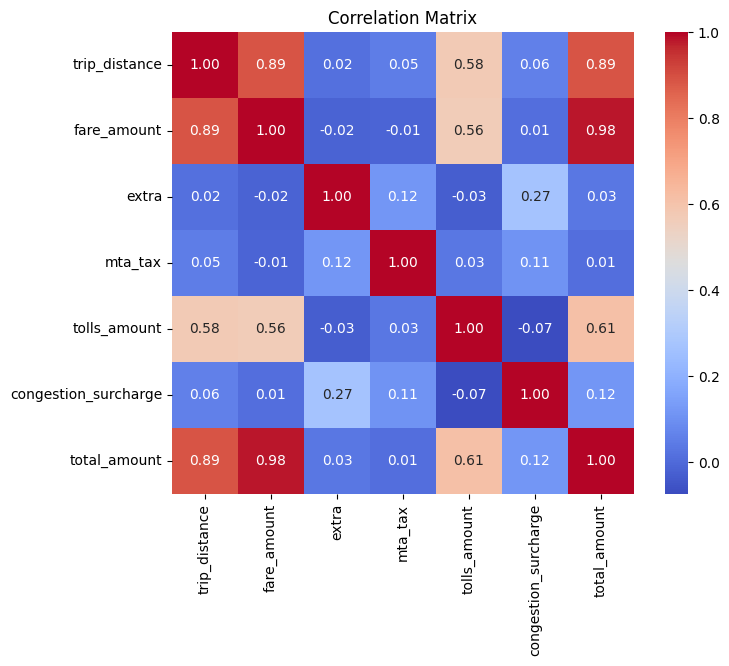

In [11]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


continuous_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'total_amount']
correlation_matrix = raw_df[continuous_columns].corr()

# melihat korelasi terhadap 'total_amount' untuk melihat faktor yang paling berpengaruh
correlation_with_total = correlation_matrix['total_amount'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

### Pertanyaan 1: Faktor apa yang mempengaruhi tarif total perjalanan? (cukup pertimbangkan atribut kontinu saja

Berdasarkan heatmap yang dibuat dari korelasi pearson, variabel `total_amount` memiliki korelasi (hubungan linear) yang sangat tinggi dengan variabel **trip_distance dan fare_amount**. Hal ini menunjukkan bahwa tarif dasar perjalanan dan jarak tempuh perjalanan merupakan faktor yang mempengaruhi tarif total perjalanan.

#### Hubungan Antara Jumlah Penumpang dan Jarak Perjalanan

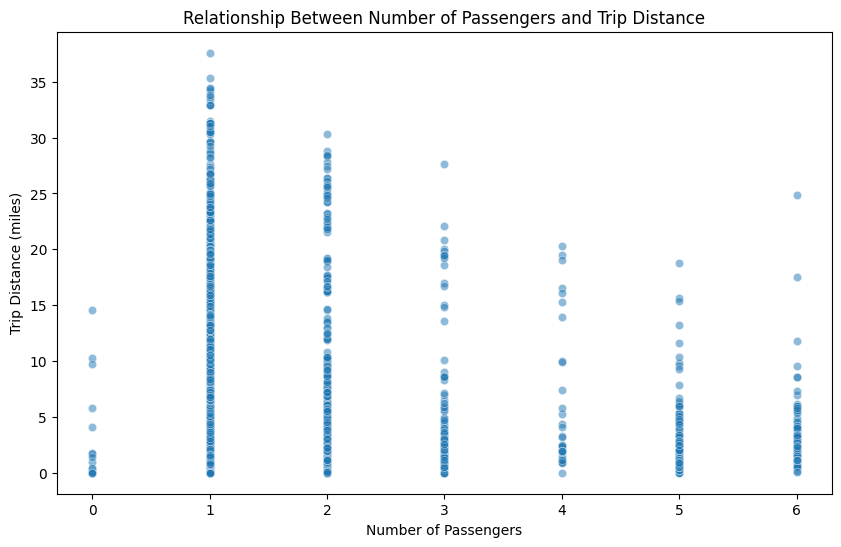

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='trip_distance', data=raw_df, alpha=0.5)
plt.title('Relationship Between Number of Passengers and Trip Distance')
plt.xlabel('Number of Passengers')
plt.ylabel('Trip Distance (miles)')
plt.show()

### Pertanyaan 2: Apakah terdapat hubungan antara jumlah penumpang dan jarak perjalanan

Berdasarkan grafik scatterplot di atas, dapat diketahui bahwa **tidak ada hubungan** yang signifikan antara jumlah penumpang dan jarak perjalana

## Waktu Tersibuk Perjalanan Taxi

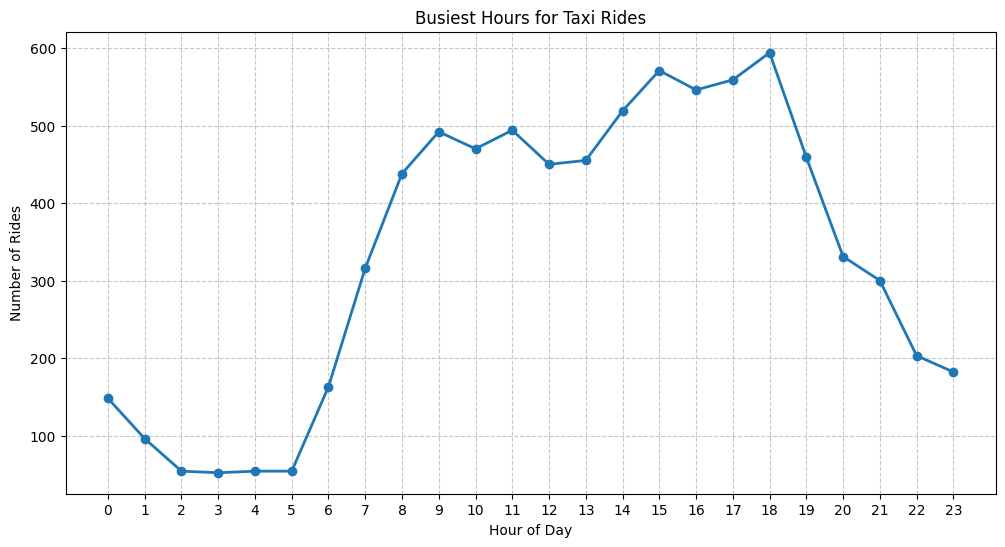

In [13]:
raw_df['lpep_pickup_datetime'] = pd.to_datetime(raw_df['lpep_pickup_datetime'], errors='coerce')

explore_df = raw_df.copy()
explore_df['hour_of_day'] = explore_df['lpep_pickup_datetime'].dt.hour
hourly_counts = explore_df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2)

plt.title('Busiest Hours for Taxi Rides')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3: Kapan waktu tersibuk untuk perjalanan taksi

Berdasarkan grafik line chart di atas, dapat dilihat bahwa waktu tersibuk perjalanan taksi berada pada **pukul 18.00**, di mana mulai terjadi peningkatan jumlah perjalanan pada sore hari, mulai rentang waktu pukul 15.00 - 18.00. Hal ini dapat disebabkan karena pada rentang waktu tersebut merupakan **rush hour** yang bertepatan dengan jam pulang kerja

## Zona Pickup dengan Perjalanan Terbanyak

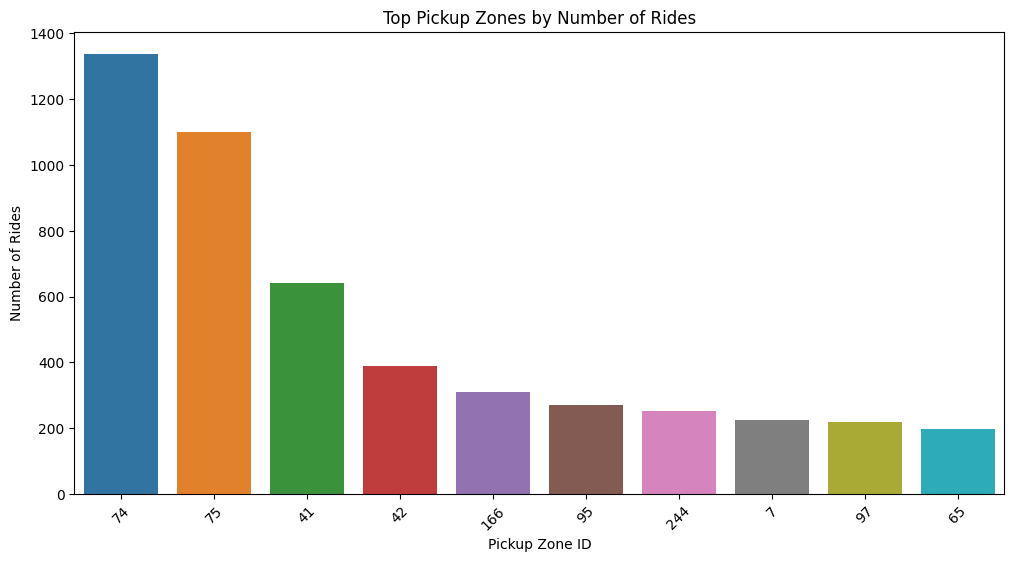

In [14]:
top_pickup_zones = raw_df['PULocationID'].value_counts().head(10)
top_pickup_zones = top_pickup_zones.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index,
            y=top_pickup_zones.values,
            order=top_pickup_zones.index)
plt.title('Top Pickup Zones by Number of Rides')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: Zona pickup mana yang memiliki perjalanan terbanyak?

Berdasarkan grafik batang diatas, dapat dilihat bahwa **Zona dengan ID 74 memiliki jumlah perjalanan terbanyak**. Hal ini mengindikasikan bahwa zona tersebut merupakan pusat bisnis atau daerah ramai, seperti bandara atau termina

## Pengaruh Jarak Perjalanan pada Jumlah Tip (Eksplorasi Tambahan)

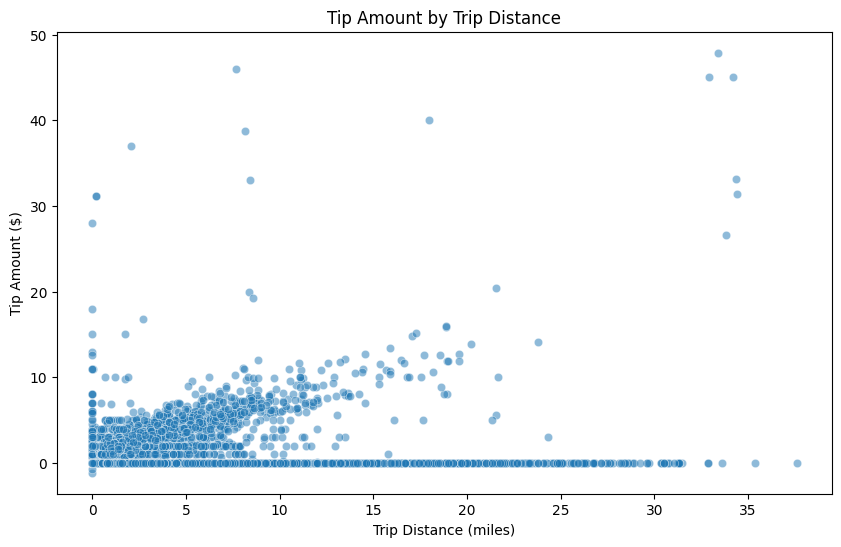

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

Scatter plot menunjukkan bahwa terdapat hubungan positif antara jarak perjalanan dan jumlah tip yang diberikan, di mana perjalanan dengan jarak yang lebih jauh cenderung mendapatkan tip yang lebih tinggi. Pada perjalanan pendek (0-5 mil), sebagian besar tip rendah atau tidak ada sama sekali, menunjukkan bahwa penumpang cenderung memberikan tip kecil atau tidak memberikan tip pada perjalanan singkat. Meskipun demikian, terdapat beberapa outlier dengan tip tinggi pada jarak perjalanan yang sangat jauh (lebih dari 25 mil), yang mungkin disebabkan oleh faktor lain seperti kualitas layanan. Secara keseluruhan, meskipun terdapat beberapa variasi, tip cenderung lebih tinggi pada perjalanan dengan jarak yang lebih jauh

## Jarak Perjalanan dan Waktu Hari pada Data Perjalanan Taksi (Eskplorasi Tambahan)

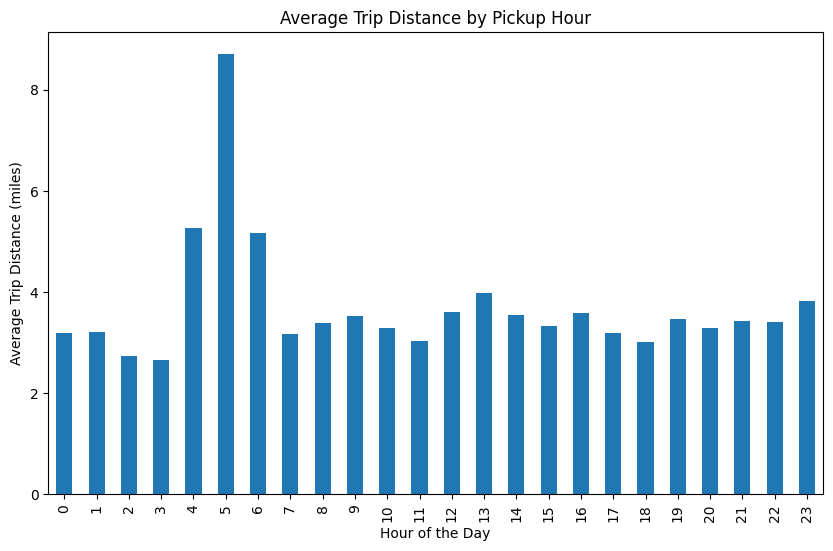

In [16]:
raw_df['lpep_pickup_datetime'] = pd.to_datetime(raw_df['lpep_pickup_datetime'])
explore_df = raw_df.copy()
explore_df['pickup_hour'] = explore_df['lpep_pickup_datetime'].dt.hour

avg_trip_distance_by_hour = explore_df.groupby('pickup_hour')['trip_distance'].mean()

plt.figure(figsize=(10, 6))
avg_trip_distance_by_hour.plot(kind='bar')
plt.title('Average Trip Distance by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

Berdasarkan grafik di atas, jarak rata-rata perjalanan taksi menunjukkan puncak tertinggi pada pukul 5 pagi, dengan rata-rata jarak tempuh melebihi 8 mil. Hal ini mengindikasikan adanya perjalanan jarak jauh yang lebih umum dilakukan pada jam-jam awal pagi, kemungkinan untuk tujuan khusus seperti menuju bandara atau area di luar kota. Setelah pukul 5 pagi, jarak rata-rata kembali menurun dan stabil sepanjang hari, dengan sedikit peningkatan di beberapa jam, namun tetap berada di kisaran 2-5 mil.

# Clustering

## Clone Data

In [ ]:
df_clustering = raw_df.copy()

## Clustering Data Processing

### Drop `Payment_Type`

In [ ]:
df_clustering = df_clustering[df_clustering['payment_type'].isin([1, 2])]

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoding store_and_fwd_flag
label_encoder = LabelEncoder()

df_clustering["store_and_fwd_flag"] = label_encoder.fit_transform(df_clustering["store_and_fwd_flag"])

In [ ]:
# Convert datetime
df_clustering['pickup_datetime'] = pd.to_datetime(df_clustering['lpep_pickup_datetime'])
df_clustering['dropoff_datetime'] = pd.to_datetime(df_clustering['lpep_dropoff_datetime'])

In [ ]:
# Extract time-based features
df_clustering['pickup_hour'] = df_clustering['pickup_datetime'].dt.hour
df_clustering['pickup_day'] = df_clustering['pickup_datetime'].dt.dayofweek
df_clustering['pickup_month'] = df_clustering['pickup_datetime'].dt.month
df_clustering['dropoff_hour'] = df_clustering['dropoff_datetime'].dt.hour
df_clustering['dropoff_day'] = df_clustering['dropoff_datetime'].dt.dayofweek
df_clustering['dropoff_month'] = df_clustering['dropoff_datetime'].dt.month

In [ ]:
# Create trip_duration column
df_clustering['trip_duration'] = (df_clustering['dropoff_datetime'] - df_clustering['pickup_datetime']).dt.total_seconds() / 60

In [ ]:
def encode_cyclical(df, feature, max_val):
    df_clustering[f'{feature}_sin'] = np.sin(2 * np.pi * df[feature] / max_val)
    df_clustering[f'{feature}_cos'] = np.cos(2 * np.pi * df[feature] / max_val)

In [ ]:
# Cyclinical encoding hour and month
encode_cyclical(df_clustering, 'pickup_hour', 24)
encode_cyclical(df_clustering, 'dropoff_hour', 24)
encode_cyclical(df_clustering, 'pickup_month', 12)
encode_cyclical(df_clustering, 'dropoff_month', 12)

In [ ]:
# Drop unnecessary columns
df_clustering = df_clustering.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'dropoff_datetime'], axis=1)

In [ ]:
df_clustering['speed'] = df_clustering['trip_distance'] / df_clustering['trip_duration'].replace(0, np.nan)
df_clustering['fare_per_mile'] = df_clustering['fare_amount'] / df_clustering['trip_distance'].replace(0, np.nan)
df_clustering['fare_per_minute'] = df_clustering['fare_amount'] / (df_clustering['trip_duration'] * 60).replace(0, np.nan)
df_clustering['tip_percentage'] = (df_clustering['tip_amount'] / df_clustering['fare_amount']) * 100
df_clustering['extra_charges'] = df_clustering['total_amount'] - df_clustering['fare_amount']

df_clustering['congestion_surcharge_percentage'] = (df_clustering['congestion_surcharge'] / df_clustering['total_amount']) * 100
df_clustering['fare_vs_tip_ratio'] = df_clustering['fare_amount'] / df_clustering['tip_amount'].replace(0, np.nan)
df_clustering['tolls_ratio'] = df_clustering['tolls_amount'] / df_clustering['total_amount'].replace(0, np.nan)
df_clustering['improvement_surcharge_percentage'] = (df_clustering['improvement_surcharge'] / df_clustering['total_amount']) * 100
df_clustering['hourly_fare_rate'] = df_clustering['fare_amount'] / (df_clustering['trip_duration'] / 60).replace(0, np.nan)
df_clustering['fare_distance_ratio'] = df_clustering['fare_amount'] / df_clustering['trip_distance'].replace(0, np.nan)
df_clustering['is_peak_hour'] = (df_clustering['pickup_hour'].isin(range(7, 10)) | df_clustering['pickup_hour'].isin(range(17, 20))).astype(int)
df_clustering['is_weekend'] = (df_clustering['pickup_day'].isin([5, 6])).astype(int)

In [ ]:
df_clustering.head()

,ID,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_percentage,extra_charges,congestion_surcharge_percentage,fare_vs_tip_ratio,tolls_ratio,improvement_surcharge_percentage,hourly_fare_rate,fare_distance_ratio,is_peak_hour,is_weekend
0,T03315,2.0,0,1.0,152,142,1.0,4.30,18.0,1.0,...,27.777778,9.55,9.981851,3.600000,0.000000,1.088929,51.798561,4.186047,1,0
1,T07720,2.0,0,1.0,93,107,2.0,13.52,38.0,0.5,...,31.973684,22.75,4.526749,3.127572,0.107819,0.493827,95.132128,2.810651,0,0
2,T09695,2.0,0,1.0,74,75,1.0,1.55,8.0,0.0,...,0.000000,0.80,0.000000,NaN,0.000000,3.409091,53.432282,5.161290,0,0
3,T08802,2.0,0,1.0,226,129,1.0,1.22,8.0,0.0,...,0.000000,0.80,0.000000,NaN,0.000000,3.409091,48.322148,6.557377,0,0
4,T01413,2.0,0,1.0,55,86,1.0,14.23,45.5,1.0,...,0.000000,4.25,0.000000,NaN,0.049246,0.603015,50.477658,3.197470,1,0


### Outlier Handling

In [ ]:
# Cek Outlier
import numpy as np

def check_outlier(df):
    # Pilih hanya kolom numerik
    numeric_df = df.select_dtypes(include=np.number)

    # Hitung Q1 dan Q3
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Hitung IQR dan batas bawah/atas
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = (numeric_df < lower_limit) | (numeric_df > upper_limit)

    # Tampilkan jumlah outlier untuk setiap kolom
    print("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = check_outlier(df_clustering)

Outlier pada tiap atribut:
VendorID                            1293
store_and_fwd_flag                    34
RatecodeID                           371
PULocationID                         567
DOLocationID                           0
passenger_count                      998
trip_distance                        798
fare_amount                          722
extra                                270
mta_tax                              337
tip_amount                           353
tolls_amount                         439
ehail_fee                              0
improvement_surcharge                 32
total_amount                         687
trip_type                            300
congestion_surcharge                1745
payment_type                           0
pickup_hour                            0
pickup_day                             0
pickup_month                           9
dropoff_hour                           0
dropoff_day                            0
dropoff_month                 

In [ ]:
# Outlier Handling dengan IQR
# Outlier Handling dengan IQR
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Instead of removing, cap the values
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

numerical_columns = df_clustering.select_dtypes(include=[np.number]).columns
df = handle_outliers(df_clustering, numerical_columns)

In [ ]:
# Cek outliers
outliers = check_outlier(df_clustering)

Outlier pada tiap atribut:
VendorID                            0
store_and_fwd_flag                  0
RatecodeID                          0
PULocationID                        0
DOLocationID                        0
passenger_count                     0
trip_distance                       0
fare_amount                         0
extra                               0
mta_tax                             0
tip_amount                          0
tolls_amount                        0
ehail_fee                           0
improvement_surcharge               0
total_amount                        0
trip_type                           0
congestion_surcharge                0
payment_type                        0
pickup_hour                         0
pickup_day                          0
pickup_month                        0
dropoff_hour                        0
dropoff_day                         0
dropoff_month                       0
trip_duration                       0
pickup_hour_sin        

## Modeling

### Membuat fitur `peak_hour`

In [ ]:
# Create peak_hour
df_clustering['peak_hour'] = 0
peak_hours = set(range(7, 10)).union(set(range(17, 20)))
df.loc[df['pickup_hour'].isin(peak_hours), 'peak_hour'] = 1

### Memilih fitur

In [ ]:
# Select features
features = ['extra', 'trip_distance', 'peak_hour']
X = df_clustering[features]

### Standarisasi Fitur dengan StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans Clustering

In [ ]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

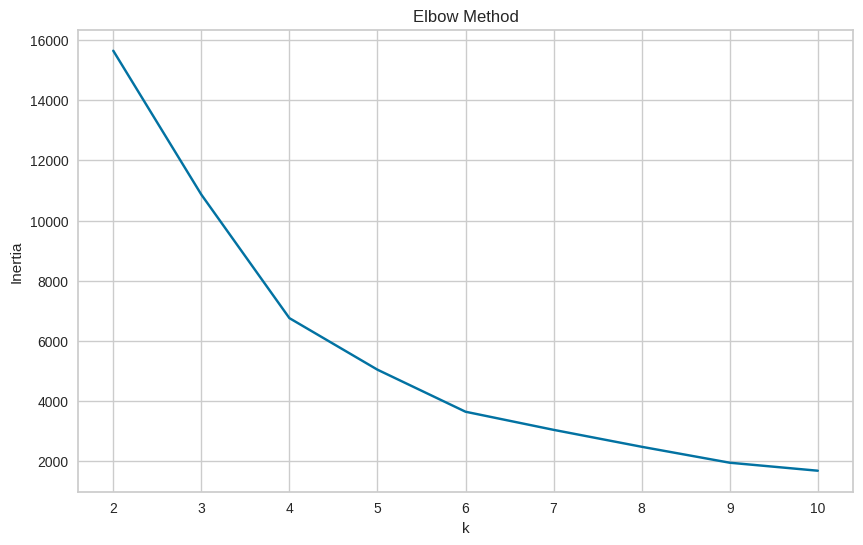

In [ ]:
# Elbow Method
inertias = []
K = range(2, 11)

plt.figure(figsize=(10, 6))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

For n_clusters = 2 The average silhouette_coefficient is : 0.6642339472840196
For n_clusters = 3 The average silhouette_coefficient is : 0.49135557971220273
For n_clusters = 4 The average silhouette_coefficient is : 0.4081432628669304
For n_clusters = 5 The average silhouette_coefficient is : 0.3595799232699986
For n_clusters = 6 The average silhouette_coefficient is : 0.39578934106917735
For n_clusters = 7 The average silhouette_coefficient is : 0.4055206509297542


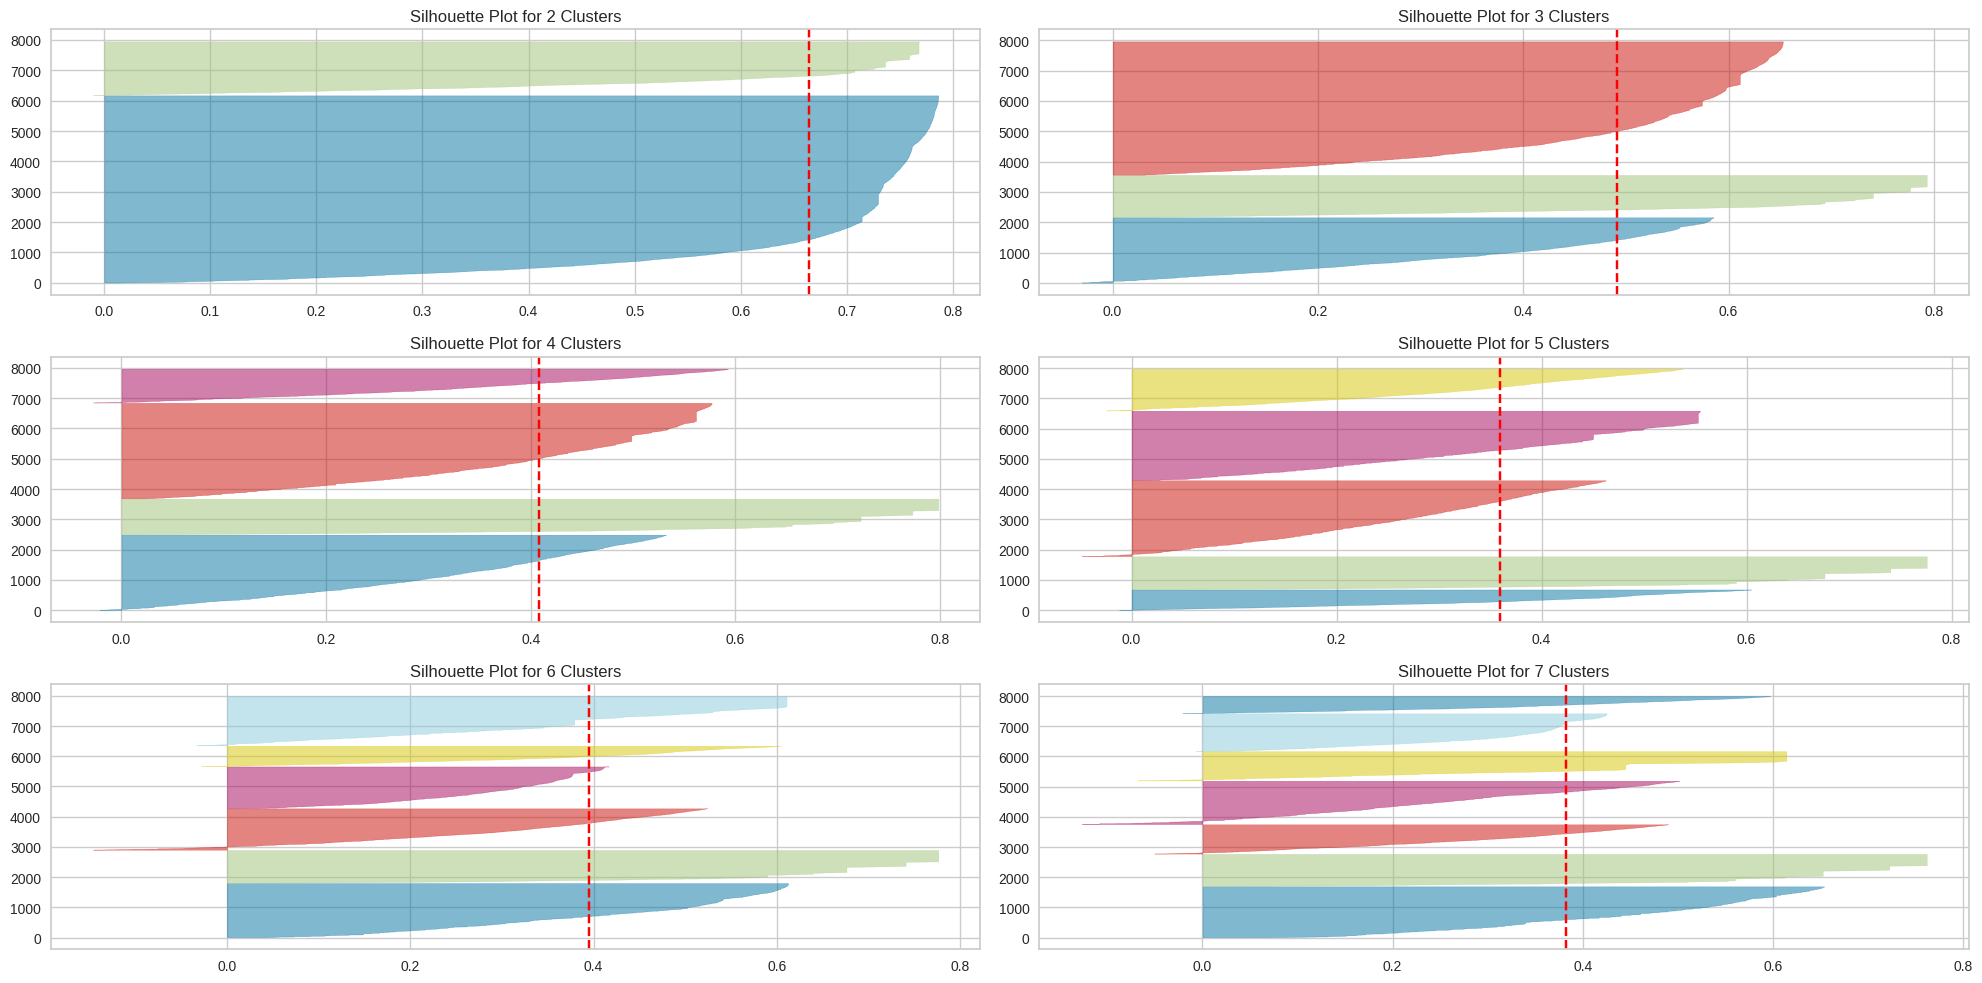

In [ ]:
# Detailed Silhouette Analysis
num_of_cluster = [2, 3, 4, 5, 6, 7]
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in num_of_cluster:
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.set_title(f'Silhouette Plot for {k} Clusters')

    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )
plt.tight_layout()
plt.show()

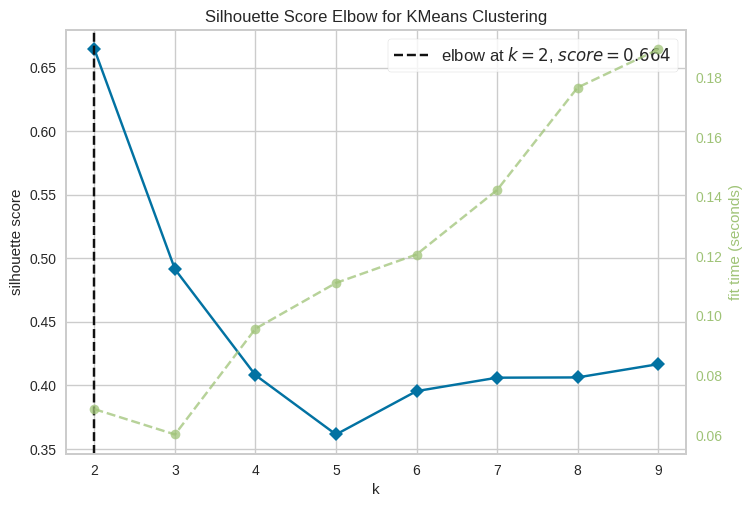

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
modeltes = KMeans(n_init = 10)
visualizer = KElbowVisualizer(modeltes, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

Berdasarkan nilai Silhoutte Score diatas, dapat dilihat bahwa k=2 merupakan nilai paling optimal. Oleh karena itu, saya memilih n_cluster = 2

In [ ]:
# Choosing the number of clusters based on silhouette analysis
n_clusters = 2

# Fit KMeans model
cluster_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_pred = cluster_model.fit_predict(X_scaled)

In [ ]:
cluster_pred = cluster_model.fit_predict(X_scaled)

# Add cluster labels to the data
data_with_clusters = pd.DataFrame(X_scaled, columns=features)
data_with_clusters['Cluster'] = cluster_pred

print("Cluster Assignments")
print(data_with_clusters['Cluster'].value_counts())

data_with_clusters

Cluster Assignments
Cluster
0    5102
1    2832
Name: count, dtype: int64


,extra,trip_distance,peak_hour,Cluster
0,1.772575,0.625749,1.342220,1
1,0.553574,2.131811,-0.745035,0
2,-0.665426,-0.512073,-0.745035,0
3,-0.665426,-0.648612,-0.745035,0
4,1.772575,2.131811,1.342220,1
...,...,...,...,...
7929,1.772575,-0.574136,1.342220,1
7930,2.382075,0.708499,-0.745035,0
7931,-0.665426,-0.834801,1.342220,1
7932,-0.665426,2.131811,-0.745035,0


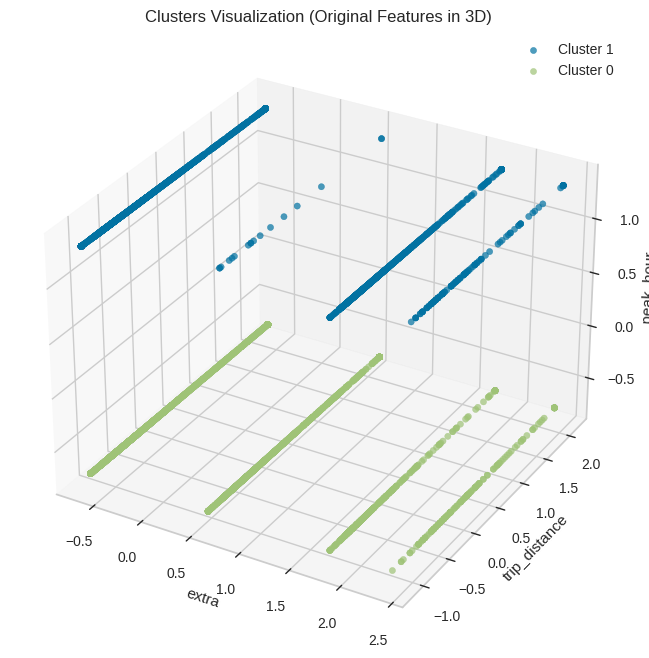

In [ ]:
# Choose three features to plot
feature_x = 'extra'
feature_y = 'trip_distance'
feature_z = 'peak_hour'

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
    ax.scatter(cluster_data[feature_x], cluster_data[feature_y], cluster_data[feature_z], label=f'Cluster {cluster_id}', alpha=0.7)

ax.set_title('Clusters Visualization (Original Features in 3D)')
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.legend()
plt.show()

In [ ]:
cluster_stats = data_with_clusters.groupby('Cluster').agg({
    'extra': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    'peak_hour': ['mean', 'std'],
}).round(2)

cluster_stats

extra       trip_distance       peak_hour     
         mean   std          mean   std      mean  std
Cluster                                               
0       -0.12  0.84          0.02  1.02     -0.75  0.0
1        0.22  1.20         -0.03  0.95      1.34  0.0

# Klasifikasi

Pada bagian ini, kami akan membangun model untuk memprediksi payment_type. Kolom payment_type pada dataset berisi informasi sebagai berikut:

- 1: Kartu Kredit
- 2: Cash

Oleh karena itu, kami akan melakukan klasifikasi menggunakan beberapa model. Berikut model yang akan kami gunakan:

- Random Forest
- Logistic Regression
- XGBoost
- CatBoost

## Clone Data

In [17]:
df_classification = raw_df.copy()

## Klasifikasi Data Processing

### Validasi Data `payment_type`

Berdasarkan deskripsi data `payment_type`, payment_type hanya bisa berupa `1` atau `2`. Namun data `payment_type` yang berada di `train_taxi.csv` memiliki nilai selain `1` dan `2`. Berikut bukti terdapat nilai selain `1` dan `2` di `train_taxi.csv`.

In [18]:
df_classification["payment_type"].unique()

array([1., 2., 3., 4.])

Berdasarkan output eskeskusi kode, ditemukan nilai selain 1 dan 2 pada kolom payment_type. Oleh karena itu, baris yang memiliki nilai payment_type selain 1 dan 2 akan kami hapus

In [19]:
df_classification = df_classification[df_classification['payment_type'].isin([1,2])]

### Drop Kolom ID

In [20]:
df_classification = df_classification.drop(columns=['ID'])

### Drop Kolom `lpep_pickup_datetime` and `lpep_dropoff_datetime`

Kedua kolom tersebut, yaitu `lpep_pickup_datetime` dan `lpep_dropoff_datetime`, memuat informasi waktu *pickup* dan waktu *dropoff* untuk setiap perjalanan taksi. Kami memutuskan untuk menghapus kedua kolom tersebut karena nilainya tidak bersifat numerik dan memiliki variasi nilai yang sangat banyak (disebabkan oleh format datetime). Mengingat banyaknya variasi nilai tersebut, proses encoding menjadi tidak praktis untuk diterapkan. Oleh karena itu, kami memutuskan untuk menghapus kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`.

In [21]:
df_classification = df_classification.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)

### Membuat Features `is_give_tip_using_credit_card`

Setelah membaca deskripsi dataset, kami menemukan satu kolom yang menarik yaitu kolom `tip_amount`. Berikut adalah deskripsi dari kolom tersebut:

tip_amount: Jumlah tip – Field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.

Dengan deskripsi tersebut, kami mengambil suatu kesimpulan bahwa, jika kolom tip_amount lebih besar dari 0, maka kemungkinan besar payment_type adalah `Kredit Card`

Berikut adalah kode untuk membuat feature ini:

In [22]:
df_classification['is_give_tip_using_credit_card'] = np.where(df_classification['tip_amount'] > 0, 1, 0)

### Encoding `payment_type`

Seperti yang sudah dijelaskan sebelumnya, `payment_type` adalah kolom yang memiliki nilai `1` dan `2`. Untuk menjadikannya masalah binary dan bukan multiclass, kami akan encode `payment_type` menjadi `0` dan `1`. Kami menyesuikan encode `payment_type` berdasarkan value `is_give_tip_using_credit_card`

In [23]:
df_classification['payment_type'] = df_classification['payment_type'].replace({
    2: 0,
    1: 1
})

### Encoding `store_and_fwd_flag` - Label Encoder

Dikarenakan nilai kolom `store_and_fwd_flag` adalah `N` atau `Y`, kami harus melakukan encoding menjadi `0` atau `1`.

In [24]:
from sklearn.preprocessing import LabelEncoder # type: ignore

label_encoder = LabelEncoder()
df_classification["store_and_fwd_flag"] = label_encoder.fit_transform(df_classification["store_and_fwd_flag"])

### Mengubah Tipe Data Kolom Kategorikal

Pada dataset, terdapat kolom kategorikal yang masih menggunakan float. Oleh karena itu, untuk kompatibilitas dengan model kami akan konversi ke int.

In [25]:
df_classification['trip_type'] = df_classification['trip_type'].astype('int')
df_classification["RatecodeID"] = df_classification["RatecodeID"].astype('int')
df_classification["passenger_count"]  = df_classification["passenger_count"].astype('int')
df_classification["VendorID"] = df_classification["VendorID"].astype('int')

### Data Overview

In [26]:
df_classification.apply(lambda x: x.unique())

VendorID                                                                    [2, 1]
store_and_fwd_flag                                                          [0, 1]
RatecodeID                                                         [1, 5, 2, 4, 3]
PULocationID                     [152, 93, 74, 226, 55, 75, 212, 82, 244, 41, 6...
DOLocationID                     [142, 107, 75, 129, 86, 263, 212, 226, 235, 74...
passenger_count                                              [1, 2, 3, 6, 5, 4, 0]
trip_distance                    [4.3, 13.52, 1.55, 1.22, 14.23, 1.2, 0.0, 2.34...
fare_amount                      [18.0, 38.0, 8.0, 45.5, 7.2, 25.0, 10.5, 7.0, ...
extra                                       [1.0, 0.5, 0.0, 3.75, 2.75, 3.25, 4.5]
mta_tax                                                                 [0.5, 0.0]
tip_amount                       [5.0, 12.15, 0.0, 1.0, 3.6, 2.51, 7.41, 6.11, ...
tolls_amount                     [0.0, 6.55, 2.45, 6.12, 3.0, 13.75, 9.0, 13.1,...
impr

In [27]:
df_classification.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type,is_give_tip_using_credit_card
0,2,0,1,152,142,1,4.30,18.0,1.0,0.5,5.00,0.00,0.3,27.55,1,2.75,1.0,1
1,2,0,1,93,107,2,13.52,38.0,0.5,0.5,12.15,6.55,0.3,60.75,1,2.75,1.0,1
2,2,0,1,74,75,1,1.55,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1,0.00,0.0,0
3,2,0,1,226,129,1,1.22,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1,0.00,0.0,0
4,2,0,1,55,86,1,14.23,45.5,1.0,0.5,0.00,2.45,0.3,49.75,1,0.00,1.0,0


## Modeling

### Fungsi untuk metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # type: ignore

def classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP', 'TN', 'FP', 'FN'],
        'Value': [accuracy, precision, recall, f1, tp, tn, fp, fn]
    })
    return metrics_df

### XGBoost With Hyperparameter Tuning

In [ ]:
import xgboost as xgb # type: ignore
from sklearn.model_selection import train_test_split, RandomizedSearchCV #type: ignore

In [ ]:
X_xgbc = df_classification.drop(columns=['payment_type'], axis=1)
y_xgbc = df_classification['payment_type']

In [ ]:
X_xgbc_train, X_xgbc_test, y_xgbc_train, y_xgbc_test = train_test_split(X_xgbc, y_xgbc, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 500, 1000, 1500, 2000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_lambda': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0],
}

model = xgb.XGBClassifier(objective='binary:logistic')
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                n_iter=100, scoring='f1_macro',
                                cv=5, verbose=1, n_jobs=-1, random_state=42)

In [ ]:
# random_search.fit(X_xgbc_train, y_xgbc_train)

In [ ]:
# best_params = random_search.best_params_
# print(best_params)

# best_model = random_search.best_estimator_
# print(best_model)# 

In [ ]:
xgbc_params = {'subsample': 1.0, 'reg_lambda': 2.0, 'reg_alpha': 0.2, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7} 
xgbc_model =  xgb.XGBClassifier(objective='binary:logistic', **xgbc_params)
xgbc_model.fit(X_xgbc_train, y_xgbc_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_xgbc_pred = xgbc_model.predict(X_xgbc_test)

In [ ]:
xgbc_result = classification_metrics(y_xgbc_test, y_xgbc_pred)
xgbc_result

,Metric,Value
0,Accuracy,0.928796
1,Precision,0.979064
2,Recall,0.892256
3,F1-Score,0.933647
4,TP,795.000000
5,TN,679.000000
6,FP,17.000000
7,FN,96.000000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # type: ignore

def classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP', 'TN', 'FP', 'FN'],
        'Value': [accuracy, precision, recall, f1, tp, tn, fp, fn]
    })
    return metrics_df

# Regresi

Pada bagian ini, kami akan melakukan prediksi untuk kolom `trip_distance`. Kolom `trip_distance` merupakan kolom yang bersifat numerik dan kontinu. Oleh karena itu, kami akan melakukan regresi untuk memprediksi kolom tersebut.

Berikut adalah model regresi yang akan kami gunakan untuk melakukan prediksi kolom `trip_distance`:

- XGBoost No Hypertuning
- XGBoost Hypertuning
- CatBoost No Hypertuning

## Regresi Data Processing

### Clone Data

In [28]:
df_regression = raw_df.copy()

### Validasi Data `payment_type`

Berdasarkan deskripsi data `payment_type`, payment_type hanya bisa berupa `1` atau `2`. Namun data `payment_type` yang berada di `train_taxi.csv` memiliki nilai selain `1` dan `2`. Berikut bukti terdapat nilai selain `1` dan `2` di `train_taxi.csv`.

In [29]:
df_regression["payment_type"].unique()

array([1., 2., 3., 4.])

Berdasarkan output eskeskusi kode, ditemukan nilai selain 1 dan 2 pada kolom payment_type. Oleh karena itu, baris yang memiliki nilai payment_type selain 1 dan 2 akan kami hapus

In [30]:
df_regression = df_regression[df_regression['payment_type'].isin([1,2])]

### Drop Kolom ID

In [31]:
df_regression = df_regression.drop(columns=['ID'])

### Encoding `store_and_fwd_flag` - Label Encoder

Dikarenakan nilai kolom `store_and_fwd_flag` adalah `N` atau `Y`, kami harus melakukan encoding menjadi `0` atau `1`.

In [32]:
from sklearn.preprocessing import LabelEncoder # type: ignore

label_encoder = LabelEncoder()
df_regression["store_and_fwd_flag"] = label_encoder.fit_transform(df_regression["store_and_fwd_flag"])

### Encoding untuk kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` 


Kolom lpep_pickup_datetime dan lpep_dropoff_datetime berisi informasi waktu penjemputan dan pengantaran untuk setiap perjalanan taksi. Berdasarkan analisis yang kami lakukan, kedua kolom tersebut dapat dimanfaatkan untuk mengekstraksi data:

- Durasi perjalanan (trip duration)
- Jam penjemputan (pickup hour)
- Hari penjemputan (pickup day)
- Bulan penjemputan (pickup month)

Dari data-data tersebut, kami akan melakukan encoding ulang. Berikut adalah metode encoding yang akan kami gunakan:

- Jam penjemputan: cylinical encoding
- Bulan Penjemputan: cylindrical encoding
- Hari penjuemputan: One-hot encoding


#### Mendapatkan kolom pickup_day, dropoff_day, pickup_month, dropoff_month

In [33]:
df_regression['pickup_datetime'] = pd.to_datetime(df_regression['lpep_pickup_datetime']) 
df_regression['dropoff_datetime'] = pd.to_datetime(df_regression['lpep_dropoff_datetime'])

df_regression['pickup_hour'] = df_regression['pickup_datetime'].dt.hour
df_regression['pickup_day'] = df_regression['pickup_datetime'].dt.dayofweek
df_regression['pickup_month'] = df_regression['pickup_datetime'].dt.month
df_regression['dropoff_hour'] = df_regression['dropoff_datetime'].dt.hour
df_regression['dropoff_day'] = df_regression['dropoff_datetime'].dt.dayofweek
df_regression['dropoff_month'] = df_regression['dropoff_datetime'].dt.month

#### Mendapatkan trip_duration

In [34]:
df_regression['trip_duration'] = (df_regression['dropoff_datetime'] - df_regression['pickup_datetime']).dt.total_seconds() / 60

#### Cylinical Encoding

In [35]:
def encode_cyclical(feature, max_val):
    df_regression[f'{feature}_sin'] = np.sin(2 * np.pi * df_regression[feature] / max_val)
    df_regression[f'{feature}_cos'] = np.cos(2 * np.pi * df_regression[feature] / max_val)

encode_cyclical('pickup_hour', 24)
encode_cyclical('dropoff_hour', 24)
encode_cyclical('pickup_month', 12)
encode_cyclical('dropoff_month', 12)

#### Drop kolom waktu yang tidak diperlukan

Setelah encoding menjadi cyclical encoding, setiap kolom tersebut (jam, hari, dan bulan) akan menghasilkan dua kolom numerik baru yang merepresentasikan nilai sinus (sin) dan kosinus (cos) dari fitur waktu tersebut. Kedua kolom hasil transformasi (sin dan cos) inilah yang akan kita gunakan selanjutnya. Kolom waktu awal (lpep_pickup_datetime dan lpep_dropoff_datetime) beserta kolom hasil ekstraksi fitur (jam, hari, bulan) akan dihapus karena tidak lagi diperlukan.

In [36]:
df_regression = df_regression.drop(columns=['pickup_hour', 'pickup_month', 'dropoff_hour', 'dropoff_month', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'dropoff_datetime'], axis=1)

#### One Hot Encoding untuk `pickup_day` dan `dropoff_day`

In [37]:
pickup_day_one_hot = pd.get_dummies(df_regression['pickup_day'], prefix='pickup_day', drop_first=True).astype(int)
dropoff_day_one_hot = pd.get_dummies(df_regression['dropoff_day'], prefix='dropoff_day', drop_first=True).astype(int)
df_regression = pd.concat([df_regression, pickup_day_one_hot, dropoff_day_one_hot], axis=1) 

In [38]:
df_regression = df_regression.drop(columns=['pickup_day', 'dropoff_day'], axis=1)

### Data Overview

In [39]:
df_regression.apply(lambda x: x.unique())

VendorID                                                        [2.0, 1.0]
store_and_fwd_flag                                                  [0, 1]
RatecodeID                                       [1.0, 5.0, 2.0, 4.0, 3.0]
PULocationID             [152, 93, 74, 226, 55, 75, 212, 82, 244, 41, 6...
DOLocationID             [142, 107, 75, 129, 86, 263, 212, 226, 235, 74...
passenger_count                        [1.0, 2.0, 3.0, 6.0, 5.0, 4.0, 0.0]
trip_distance            [4.3, 13.52, 1.55, 1.22, 14.23, 1.2, 0.0, 2.34...
fare_amount              [18.0, 38.0, 8.0, 45.5, 7.2, 25.0, 10.5, 7.0, ...
extra                               [1.0, 0.5, 0.0, 3.75, 2.75, 3.25, 4.5]
mta_tax                                                         [0.5, 0.0]
tip_amount               [5.0, 12.15, 0.0, 1.0, 3.6, 2.51, 7.41, 6.11, ...
tolls_amount             [0.0, 6.55, 2.45, 6.12, 3.0, 13.75, 9.0, 13.1,...
improvement_surcharge                                           [0.3, 0.0]
total_amount             

In [40]:
df_regression.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,pickup_day_3,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_1,dropoff_day_2,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
0,2.0,0,1.0,152,142,1.0,4.30,18.0,1.0,0.5,...,0,1,0,0,0,0,0,1,0,0
1,2.0,0,1.0,93,107,2.0,13.52,38.0,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0,1.0,74,75,1.0,1.55,8.0,0.0,0.5,...,0,0,0,0,0,1,0,0,0,0
3,2.0,0,1.0,226,129,1.0,1.22,8.0,0.0,0.5,...,0,0,0,0,1,0,0,0,0,0
4,2.0,0,1.0,55,86,1.0,14.23,45.5,1.0,0.5,...,1,0,0,0,0,0,1,0,0,0


## Modeling

In [ ]:
df_regression['trip_type'] = df_regression['trip_type'].astype('int')
df_regression["RatecodeID"] = df_regression["RatecodeID"].astype('int')
df_regression["passenger_count"]  = df_regression["passenger_count"].astype('int')
df_regression["VendorID"] = df_regression["VendorID"].astype('int')
df_regression["payment_type"] = df_regression["payment_type"].astype('int')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #type: ignore

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics_df = pd.DataFrame({'mae': [mae], 'mse': [mse], 'rmse': [rmse], 'r2': [r2]})
    melted_df = pd.melt(metrics_df, var_name="Metrics name", value_name="Value")
    return melted_df

### CatBoost

In [ ]:
### Import libraries
from catboost import CatBoostRegressor, Pool # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [ ]:
df_regression_ctb = df_regression.copy()

numeric_features = [
    'trip_distance',
    'fare_amount',
    'extra',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'congestion_surcharge',
    'improvement_surcharge',
    'mta_tax',
    "trip_duration",
    "pickup_hour_sin",
    "pickup_hour_cos",
    "dropoff_hour_sin",
    "dropoff_hour_cos",
    "pickup_month_sin",
    "pickup_month_cos",
    "dropoff_month_sin",
    "dropoff_month_cos",
]

categorical_features = df_regression_ctb.columns.difference(numeric_features)
categorical_features

Index(['DOLocationID', 'PULocationID', 'RatecodeID', 'VendorID',
       'dropoff_day_1', 'dropoff_day_2', 'dropoff_day_3', 'dropoff_day_4',
       'dropoff_day_5', 'dropoff_day_6', 'passenger_count', 'payment_type',
       'pickup_day_1', 'pickup_day_2', 'pickup_day_3', 'pickup_day_4',
       'pickup_day_5', 'pickup_day_6', 'store_and_fwd_flag', 'trip_type'],
      dtype='object')

In [ ]:
X_ctb = df_regression_ctb.drop(columns=['trip_distance'])
y_ctb = df_regression_ctb['trip_distance']

In [ ]:
X_ctb_train, X_ctb_test, y_ctb_train, y_ctb_test = train_test_split(X_ctb, y_ctb, test_size=0.2, random_state=42)

In [ ]:
categorical_feature_indices = [X_ctb_train.columns.get_loc(col) for col in categorical_features if col in X_ctb_train.columns]

train_pool = Pool(
    data=X_ctb_train,
    label=y_ctb_train,
    cat_features=categorical_feature_indices
)

test_pool = Pool(
    data=X_ctb_test,
    label=y_ctb_test,
    cat_features=categorical_feature_indices
)

ctb_model = CatBoostRegressor(
    loss_function='RMSE',
    verbose=0,
    od_wait=20,
    od_pval=0.01
)

In [ ]:
ctb_model.fit(train_pool, eval_set=test_pool, verbose=True)

Learning rate set to 0.06815
0:	learn: 4.4247765	test: 4.0389717	best: 4.0389717 (0)	total: 62.3ms	remaining: 1m 2s
1:	learn: 4.1879011	test: 3.8268780	best: 3.8268780 (1)	total: 67.2ms	remaining: 33.5s
2:	learn: 3.9812466	test: 3.6322620	best: 3.6322620 (2)	total: 72.2ms	remaining: 24s
3:	learn: 3.7887096	test: 3.4481864	best: 3.4481864 (3)	total: 78.3ms	remaining: 19.5s
4:	learn: 3.6131209	test: 3.2824254	best: 3.2824254 (4)	total: 84.4ms	remaining: 16.8s
5:	learn: 3.4471936	test: 3.1195621	best: 3.1195621 (5)	total: 89.8ms	remaining: 14.9s
6:	learn: 3.2849196	test: 2.9657775	best: 2.9657775 (6)	total: 93.8ms	remaining: 13.3s
7:	learn: 3.1360981	test: 2.8273248	best: 2.8273248 (7)	total: 98.1ms	remaining: 12.2s
8:	learn: 2.9923073	test: 2.6918489	best: 2.6918489 (8)	total: 103ms	remaining: 11.4s
9:	learn: 2.8575831	test: 2.5727199	best: 2.5727199 (9)	total: 109ms	remaining: 10.7s
10:	learn: 2.7386426	test: 2.4691743	best: 2.4691743 (10)	total: 113ms	remaining: 10.2s
11:	learn: 2.6257

In [ ]:
y_ctb_pred = ctb_model.predict(X_ctb_test)

In [ ]:
ctb_result = get_metrics(y_ctb_test, y_ctb_pred)
ctb_result

,Metrics name,Value
0,mae,0.364812
1,mse,0.676420
2,rmse,0.822447
3,r2,0.962855
